# 1. Import all the distributions

In [1]:
%pylab inline --no-import-all
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Get distribs and filter bad ones
import distributions

all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]

ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 100000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            # print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print "\nOK distributions: {0}".format([i.__name__ for i in ok_distributions_list])

std devs. don't match for Dist_vag273: 0.144505 vs. 0.288675
std devs. don't match for Dist_pc1727: 0.844908 vs. 1.000000
std devs. don't match for Dist_rdr335: 0.398094 vs. 0.100000
means don't match for Dist_my1462: -1.872592 vs. 3.000000
std devs. don't match for Dist_mh3908: 28.893428 vs. 38.000000
std devs. don't match for Dist_ptf223: 2.852167 vs. 2.150000
means don't match for Dist_jeg535: -3.304583 vs. 0.072000
std devs. don't match for Dist_sar653_1: 0.498887 vs. 0.626657
means don't match for Dist_jgc375: 2130.409688 vs. 2130.937950
std devs. don't match for Dist_dl3185: 0.773658 vs. 0.632456
std devs. don't match for Dist_vag273_1: 0.143879 vs. 0.288675
may have a problem

OK distributions: ['Dist_sm6376', 'Dist_ry643', 'Dist_yr595', 'Dist_psa251_2', 'Dist_kw1621', 'Dist_nj18', 'Dist_hk1764', 'Dist_yz2668', 'Dist_psa251', 'Dist_ejk483', 'Dist_ih646', 'Dist_kc90_2', 'Dist_kc90_3', 'Dist_vag273_2', 'Dist_msc565', 'Dist_jn1348', 'Dist_kjm538', 'Dist_recast', 'Dist_saw533', 'Dis

# 2. Run convolutions

Select number of samples to run

In [3]:
N_SAMPLES = 100000
N_BINS    = 50

In [4]:
# Split functions to provide more generality
def random_convolution(list_of_distributions, N, size):
    q = np.zeros(size)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        
        print 'Using: %s ' % (dist_class.__name__)
        
        q      += dist.rvs(size)
        var_q  += dist.std()**2
        mean_q += dist.mean()

    std_q = np.sqrt( var_q )
    
    return q, mean_q, std_q

def graph_convolution(dist, mean_dist, std_dist):
    counts, bins, patches = plt.hist(dist, bins=N_BINS, normed=True, alpha=.2)
    plt.plot(bins, stats.norm.pdf(bins, loc=mean_dist, scale=std_dist), lw=2, c='r')
    
    return counts, bins

Using: Dist_hk1764 
Using: Dist_psa251 
Using: Dist_kc90_3 
Using: Dist_saw533 
Using: Dist_hk1764 
Using: Dist_sm6376 
Using: Dist_jn1348 
Using: Dist_psa251 
Using: Dist_kc90_2 
Using: Dist_hk1764 
Using: Dist_msc565 
Using: Dist_kjm538 
Using: Dist_sm6376 
Using: Dist_psa251_2 
Using: Dist_sm6376 
Using: Dist_vag273_2 
Using: Dist_hk1764 
Using: Dist_msc565 
Using: Dist_msc565 
Using: Dist_jsg549 


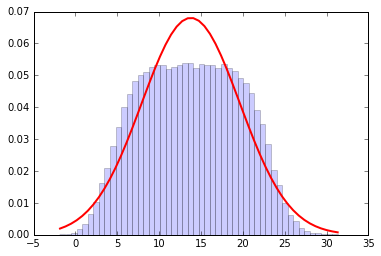

In [5]:
# 20 iterations
y, mu_y, s_y = random_convolution(ok_distributions_list, 20, N_SAMPLES)
y_counts, y_bins = graph_convolution(y, mu_y, s_y)

# 3. Generate norm predictions from bins

In [6]:
def fetch_bin_centers(bins):
    rights  = bins[1:]
    lefts   = bins[:-1]

    centers = (rights + lefts) / 2
    return centers

def bin_width(bins):
    return bins[1] - bins[0]

In [7]:
y_centers = fetch_bin_centers(y_bins)
y_centers

array([ -1.51113366,  -0.84764206,  -0.18415046,   0.47934114,
         1.14283274,   1.80632435,   2.46981595,   3.13330755,
         3.79679915,   4.46029075,   5.12378235,   5.78727396,
         6.45076556,   7.11425716,   7.77774876,   8.44124036,
         9.10473196,   9.76822357,  10.43171517,  11.09520677,
        11.75869837,  12.42218997,  13.08568157,  13.74917318,
        14.41266478,  15.07615638,  15.73964798,  16.40313958,
        17.06663118,  17.73012279,  18.39361439,  19.05710599,
        19.72059759,  20.38408919,  21.04758079,  21.7110724 ,
        22.374564  ,  23.0380556 ,  23.7015472 ,  24.3650388 ,
        25.0285304 ,  25.692022  ,  26.35551361,  27.01900521,
        27.68249681,  28.34598841,  29.00948001,  29.67297161,
        30.33646322,  30.99995482])

Check if the area is ~1, a feature of the Gaussian normal distribution (or any distribution)

In [8]:
np.sum(y_counts * (bin_width(y_bins)))

1.0

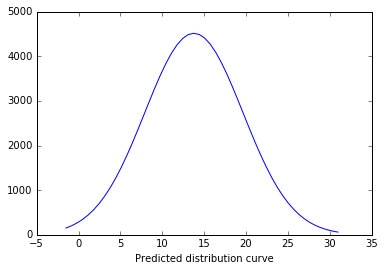

In [9]:
prediction = stats.norm.pdf(y_centers, loc=mu_y, scale=s_y)*bin_width(y_bins)*N_SAMPLES

plt.plot(y_centers, prediction)
plt.xlabel('Predicted distribution curve')

In [10]:
cs_t = np.sum(((y_counts - prediction)**2.) / prediction)
cs_t

99475.925168922768

# 4. Chi-Square Test

In [11]:
chisq_obs, p_val = stats.chisquare(y_counts, f_exp=prediction)
chisq_obs, p_val

(99475.925168922768, 0.0)

In [12]:
stats.chi2.sf(chisq_obs, y_counts.size - 1)

0.0

At the ```a = 0.01 level```, the p-value above is greatly less than ```a```, suggesting very strong evidence that the convolutions fail to reject the hypothesis of the Central Limit Theorem.